In [4]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the Iris dataset with pandas
dataset = pd.read_csv('Tennis Playstyles 3.csv')
x = dataset.iloc[:, [1, 2, 3, 4]].values

In [5]:
dataset=pd.DataFrame(dataset)
dataset

Player            Play Style  Winners/UFE Ratio  \
0          Benoit Paire  Aggressive Baseliner           1.000000   
1          Benoit Paire  Aggressive Baseliner           0.525424   
2          Benoit Paire  Aggressive Baseliner           0.562500   
3          Benoit Paire  Aggressive Baseliner           0.847826   
4          Benoit Paire  Aggressive Baseliner           1.542857   
5          Benoit Paire  Aggressive Baseliner           1.733333   
6          Benoit Paire  Aggressive Baseliner           2.320000   
7          David Goffin  Aggressive Baseliner           1.000000   
8          David Goffin  Aggressive Baseliner           0.842105   
9         Dominic Thiem  Aggressive Baseliner           1.333333   
10        Dominic Thiem  Aggressive Baseliner           6.666667   
11        Dusan Lajovic   Defensive Baseliner           0.346939   
12        Dusan Lajovic   Defensive Baseliner           0.491228   
13        Fabio Fognini  Aggressive Baseliner           1.000000   
14        Fabio Fognini  Aggressive Baseliner           0.454545   
15        Fabio Fognini  Aggressive Baseliner           0.677419   
16        Fabio Fognini  Aggressive Baseliner           0.796610   
17        Fabio Fognini  Aggressive Baseliner           0.850000   
18        Fabio Fognini  Aggressive Baseliner           0.944444   
19        Fabio Fognini  Aggressive Baseliner           1.653846   
20        Fabio Fognini  Aggressive Baseliner           1.772727   
21    Fernando Verdasco  Aggressive Baseliner           0.000000   
22    Fernando Verdasco  Aggressive Baseliner           0.788732   
23    Fernando Verdasco  Aggressive Baseliner           0.831461   
24    Fernando Verdasco  Aggressive Baseliner           1.100000   
25    Fernando Verdasco  Aggressive Baseliner           1.136364   
26         Gael Monfils   Defensive Baseliner           1.000000   
27         Gael Monfils   Defensive Baseliner           2.000000   
28         Gael Monfils   Defensive Baseliner           0.578947   
29         Gael Monfils   Defensive Baseliner           0.878788   
..                  ...                   ...                ...   
123       Roger Federer             All Court           1.809524   
124       Roger Federer             All Court           1.944444   
125       Roger Federer             All Court           2.047619   
126         Sam Querrey    Serve and Volleyer           0.000000   
127         Sam Querrey    Serve and Volleyer           0.000000   
128         Sam Querrey    Serve and Volleyer           0.658537   
129         Sam Querrey    Serve and Volleyer           1.044444   
130         Sam Querrey    Serve and Volleyer           1.135135   
131         Sam Querrey    Serve and Volleyer           1.220000   
132         Sam Querrey    Serve and Volleyer           1.392857   
133         Sam Querrey    Serve and Volleyer           1.428571   
134  Stanislas Wawrinka  Aggressive Baseliner           1.000000   
135  Stanislas Wawrinka  Aggressive Baseliner           1.000000   
136  Stanislas Wawrinka  Aggressive Baseliner           2.000000   
137  Stanislas Wawrinka  Aggressive Baseliner           2.000000   
138  Stanislas Wawrinka  Aggressive Baseliner           0.000000   
139  Stanislas Wawrinka  Aggressive Baseliner           2.000000   
140  Stanislas Wawrinka  Aggressive Baseliner           0.575000   
141  Stanislas Wawrinka  Aggressive Baseliner           0.850000   
142  Stanislas Wawrinka  Aggressive Baseliner           1.081633   
143  Stanislas Wawrinka  Aggressive Baseliner           1.100000   
144  Stanislas Wawrinka  Aggressive Baseliner           1.163265   
145  Stanislas Wawrinka  Aggressive Baseliner           1.326087   
146  Stanislas Wawrinka  Aggressive Baseliner           1.515152   
147  Stanislas Wawrinka  Aggressive Baseliner           1.540541   
148  Stanislas Wawrinka  Aggressive Baseliner           1.655172   
149  Stanislas Wawrinka  Aggressive Baseliner           1.672727   
150  

In [6]:
df_new = dataset[['Winners/UFE Ratio', 'Final Number of Games Won', 'Aces Won', 'Double Faults', 'Unforced Errors']].dropna()

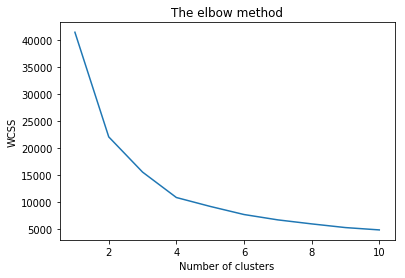

In [7]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


In [8]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km = kmeans.fit(df_new)
y = km.labels_

In [9]:
y

array([3, 0, 0, 2, 2, 3, 3, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 1, 1,
       0, 0, 3, 1, 1, 1, 0, 2, 0, 1, 3, 1, 1, 0, 0, 3, 3, 3, 1, 0, 0, 1,
       2, 2, 0, 0, 2, 0, 1, 1, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1,
       1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 3, 2, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 3, 3, 2, 3, 2, 0, 1,
       1, 2, 1, 2, 1, 2, 3, 2, 0, 0, 0, 0, 2, 3, 2, 1, 0, 1])

In [122]:
dataset['Cluster']=pd.Series(y)

In [123]:
dataset[dataset['Cluster']==1].head(25)

Player            Play Style  Winners/UFE Ratio  \
9        Dominic Thiem  Aggressive Baseliner           1.333333   
10       Dominic Thiem  Aggressive Baseliner           6.666667   
19       Fabio Fognini  Aggressive Baseliner           1.653846   
20       Fabio Fognini  Aggressive Baseliner           1.772727   
21   Fernando Verdasco  Aggressive Baseliner           0.000000   
25   Fernando Verdasco  Aggressive Baseliner           1.136364   
26        Gael Monfils   Defensive Baseliner           1.000000   
27        Gael Monfils   Defensive Baseliner           2.000000   
31        Gael Monfils   Defensive Baseliner           1.300000   
33        Gael Monfils   Defensive Baseliner           1.592593   
34  Jan-Lennard Struff  Aggressive Baseliner           2.000000   
40          John Isner    Serve and Volleyer           1.000000   
43          John Isner    Serve and Volleyer           1.793103   
50       Kei Nishikori   Defensive Baseliner           1.040000   
51       Kei Nishikori   Defensive Baseliner           1.111111   
52       Kei Nishikori   Defensive Baseliner           1.111111   
65      Novak Djokovic   Defensive Baseliner           2.000000   
66      Novak Djokovic   Defensive Baseliner           0.000000   
68      Novak Djokovic   Defensive Baseliner           2.000000   
69      Novak Djokovic   Defensive Baseliner           0.590909   
74      Novak Djokovic   Defensive Baseliner           1.115385   
75      Novak Djokovic   Defensive Baseliner           1.333333   
76      Novak Djokovic   Defensive Baseliner           1.347826   
77      Novak Djokovic   Defensive Baseliner           1.571429   
78      Novak Djokovic   Defensive Baseliner           1.840000   

    Final Number of Games Won  Aces Won  Double Faults  Unforced Errors  \
9                         0.0      10.0            3.0             21.0   
10                        3.0      20.0            3.0              3.0   
19                        3.0       9.0            3.0             26.0   
20                        1.0      10.0            5.0             22.0   
21                        2.0       5.0           14.0             24.0   
25                        1.0       4.0            5.0             22.0   
26                        1.0       7.0            3.0             21.0   
27                        3.0       5.0            1.0             24.0   
31                        3.0      13.0            3.0             30.0   
33                        3.0       9.0            5.0             27.0   
34                        2.0      11.0           13.0             30.0   
40                        0.0      10.0            0.0             23.0   
43                        0.0      14.0            1.0             29.0   
50                        2.0       2.0            4.0             25.0   
51                        3.0       3.0            1.0             27.0   
52                        3.0       5.0            3.0             27.0   
65                        3.0       5.0            1.0             25.0   
66                        3.0       9.0            6.0             29.0   
68                        3.0      13.0            2.0             28.0   
69                        0.0       2.0            0.0             22.0   
74                        1.0       1.0            2.0             26.0   
75                        3.0      10.0            0.0             30.0   
76                        3.0       6.0            1.0             23.0   
77                        3.0       7.0            2.0             21.0   
78                        1.0      11.0            0.0             25.0   

    Unnamed: 7  Unnamed: 8  Unnamed: 9  Cluster  
9          NaN         NaN         NaN      1.0  
10         NaN         NaN         NaN      1.0  
19         NaN         NaN         NaN      1.0  
20         NaN         NaN         NaN      1.0  
21         NaN         NaN         NaN      1.0  
25         NaN        

In [ ]:

dataset.to_csv(r'C:\Users\AJ\Documents\Machine Learning Project\Tennis Clusters.csv')

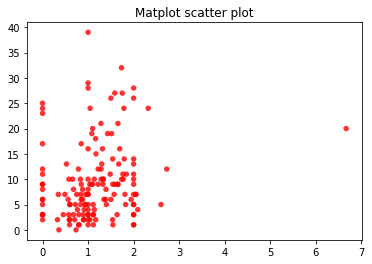

In [167]:
import numpy as np
import matplotlib.pyplot as plt


x =dataset["Winners/UFE Ratio"]
y =dataset["Aces Won"]
colors = ("red", "green", "blue")
clusters = dataset["Cluster"]

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=clusters)

plt.title('Matplot scatter plot')
plt.show()






In [3]:

dataset.to_csv(r'C:\Users\AJ\Documents\Machine Learning Project\Tennis Clusters.csv')

NameError: name 'dataset' is not defined